# Problem Statement
* Perform the data clustering algorithm using any Clustering algorithm.

## Prepare Dataset

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3)

### Visualize Dataset

In [3]:
import matplotlib.pyplot as plt


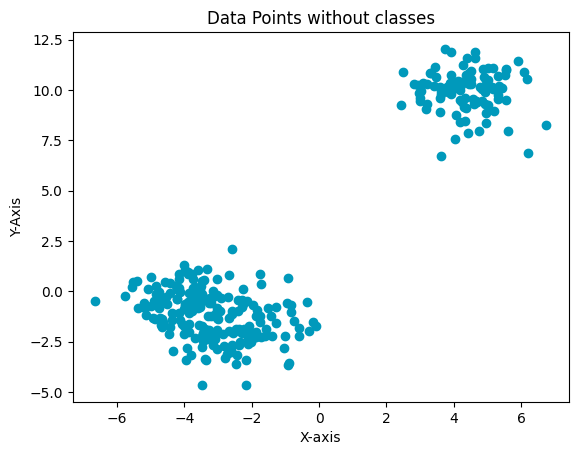

In [4]:
plt.scatter(X[:,0],X[:,1],c='#0099bb')
plt.title('Data Points without classes')
plt.xlabel('X-axis')
plt.ylabel('Y-Axis');

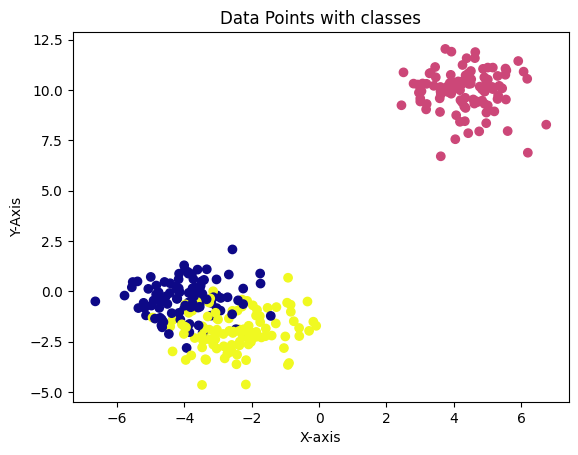

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma')
plt.title('Data Points with classes')
plt.xlabel('X-axis')
plt.ylabel('Y-Axis');

## Apply Clustering Model

### Determining The Elbow Point

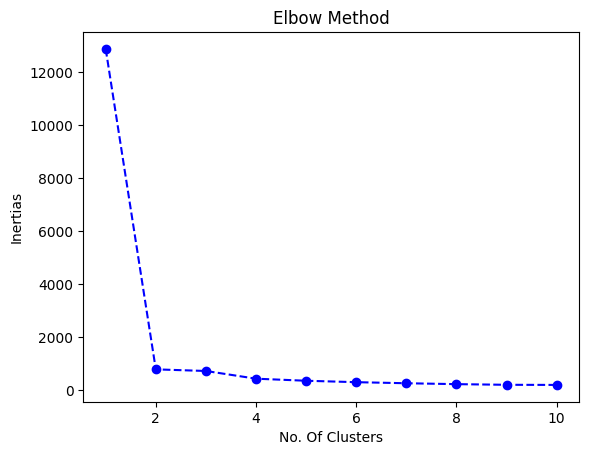

In [6]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1,11), inertias, '--ob')
plt.title('Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('Inertias');

### Determining ideal number of clusters (Programmatically)

In [7]:
threashold = 100
prev = None
ideal_n_clusters = None
for n_clusters, inertia in enumerate(inertias,start=1):
    if prev:
        if prev - inertia > threashold:
            ideal_n_clusters = n_clusters
    prev = inertia

ideal_n_clusters

4

### Applying KMeans with ideal number of clusters

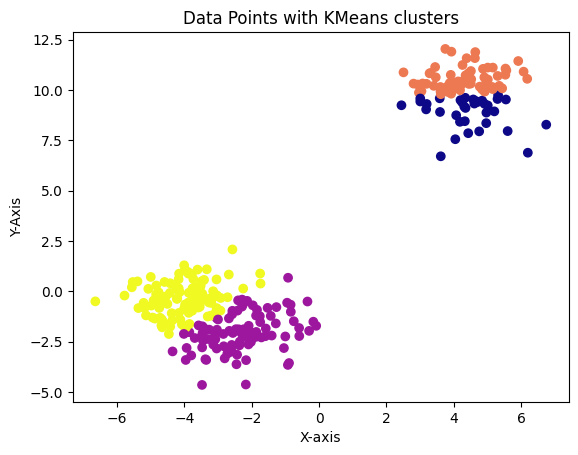

In [8]:
model = KMeans(n_clusters=ideal_n_clusters)

model.fit(X)

plt.scatter(X[:,0],X[:,1],c=model.labels_,cmap='plasma')
plt.title('Data Points with KMeans clusters')
plt.xlabel('X-axis')
plt.ylabel('Y-Axis');